In [1]:
# Import of the necessary libraries
import pandas as pd
import numpy as np
from numpy import math

import warnings
warnings.filterwarnings("ignore")


from pca import pca

## Accuracy
from sklearn.metrics import mean_squared_error

## Building Model

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


from sklearn import linear_model
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
# import statsmodels.api as sm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

## Data Visualization
import seaborn as sn
import matplotlib.pyplot as plt

## Multidimensional Scaling
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import manhattan_distances, euclidean_distances
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

### 2) Multilinear Regression (MLR) on clinical_trajectories data:  Predict the age of death 


**Multilinear regression (MLR)** is a technique used to estimate the relationship between two or more independent variables (X) and one dependent variable (Y)

I am intersetd to see whether we can predict the "**age_at_death**" of a particular patient based on given clinical symptoms. 
In this case, I will use clinical symptoms as independent variables (Y), and "age_at_death" as the dependent variable (Y).

That is why I think **Multilinear regression (MLR)** will be the right choice to analyse the data.

In [69]:
# https://www.youtube.com/watch?v=VCVhwjbI6h8

In [70]:
clinical_trajectories_df = pd.read_excel('clinical_trajectories_df.xlsx', sheet_name=0)
# df_main.head(10)

In [88]:
df = clinical_trajectories_df

In [89]:
# clinical_trajectories_df.head(10)

In [90]:
drop_list = [
    "DonorID", "neuropathological_diagnosis", "Gender", "Year_donor_death", 
    "Year", "Age", "year_before_death", "chars_in_clin" 
]


df = df.drop(drop_list, axis=1)

# clinical_trajectories_df = clinical_trajectories_df.dropna()
# df.reset_index(drop=True, inplace=True)
df.head(10)

,age_at_death,Muscular_Weakness,Spasticity,Hyperreflexia_and_oth_reflexes,Fasciculations,Positive_sensory_symptoms,Negative_sensory_symptoms,Parkinsonism,Facial_masking,Tremor,...,Orthostatic_hypotension,Headache_migraine,Fatigue,Declined_deteriorated_health,Cachexia,Weight_loss,Reduces_oral_intake,Help_in_ADL,Day_care,Admission_to_nursing_home
0,21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,21,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


### Codes to perform Multilinear regression:

In [105]:
# Define dependent and independent variables

dependent_variable = "age_at_death"

independent_variables = df.columns.tolist()
independent_variables.remove(dependent_variable)

# independent_variables

In [166]:
# Create data of independent variables
X = df[independent_variables].values

# Create data of dependent variable
y = df[dependent_variable].values

# X

In [149]:
# X.var(axis = 0).min(), X.var(axis=0).max()

(0.001773277050857518, 0.11716603759987129)

In [158]:
model = linear_model.LinearRegression()
model.fit(X, y)
pred = model.predict(X)

In [160]:
print(mean_squared_error(y, pred))
print(model.score(X, y))

153.89792722608004
0.08844659481230355


TypeError: unsupported operand type(s) for /: 'list' and 'float'

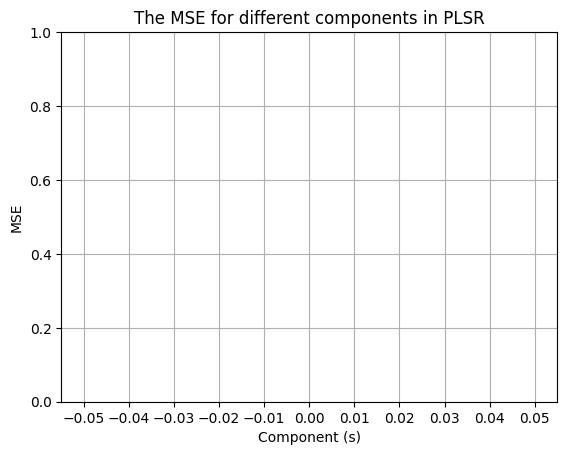

In [167]:
component = []
for i in range(1,50):
    pls = PLSRegression(n_components=i)
    pls.fit(X, y)
    pred = pls.predict(X)
    component.append(math.sqrt(mean_squared_error(y, pred)))
    
plt.xlabel("Component (s)")
plt.ylabel("MSE")
plt.title("The MSE for different components in PLSR")
plt.locator_params('x', nbins=20)
plt.grid()
plt.plot(component/component[0])

In [ ]:
pls = PLSRegression(n_components=25)
pls.fit(X, y)
pred = pls.predict(X)

In [163]:
print(mean_squared_error(y, pred))
print(pls.score(X,y))

153.89792722608004
0.08844659481230355


In [150]:
# Split the dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=0)

In [151]:
# Transforming the data
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

### Performing Linear Regression

In [152]:
# Fittin linear regression to the training data
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [153]:
#Prediting the training dataset
y_pred = regression.predict(X_test)


Now lets calculate the **Mean Squared Error (MSE)** which indicates how close a regression line is to a set of points. The lower the MSE, the better the forecast.

In [154]:
math.sqrt(mean_squared_error(y_test, y_pred))

12.293939409265654

In [155]:
print("R2 score : %.5f" % r2_score(y_test, y_pred))

R2 score : 0.09305


In [156]:
intercept_body_mass = regression.intercept_
intercept_body_mass

75.47167999812723